In [2]:
import os
from PIL import Image                       # package to manipulate and import images   
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import torch                                # package for deeplearning
from torch import nn
import torch.nn.functional as f
from torch.utils.data import DataLoader     # pytorch dataloader for easily loading minibatches during training
import torchvision                          # package for using images in deeplearning (computer vision)

from dataset import create_dataset, path_dict           # script for creating custom dataset

from preprocess import image_process

from nlp_preprocess import text_process

from pretrain_VAE import VAE

from tqdm import tqdm



# Exploring the Data (Images)  
### Convert single image to tensor and plot tensor

In [84]:
image = Image.open('/Users/ianleefmans/Desktop/data/train/part2/part2_images/11/218.jpg') ### image path on local device

In [87]:
image.getpalette # images are CMYK instead of RGB

<bound method Image.getpalette of <PIL.Image.Image image mode=RGB size=707x594 at 0x1A232B8910>>

In [29]:
image.show() # view image

In [86]:
# to convert from CMYK to RGB
if image.mode != 'RGB':
    image = image.convert('RGB')
    
image.show()

In [9]:
transform = torchvision.transforms.ToTensor() # create transform that changes image to tensor

In [22]:
image = transform(image) # transform image to tensor

In [23]:
image.size() # view image-tensor dimensions, there are 3 channels now (RGB) and the image 
             # is 400 pixels by 335 pixels

torch.Size([3, 228, 600])

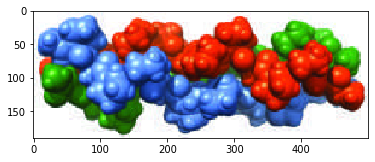

In [110]:
plt.imshow(torchvision.transforms.ToPILImage(mode='RGB')(image))   # plot image-tensor 
                                                                    #(note the same as origional image)

# Dataset Class   
### Changing images to tensors and create dataloader  
Class has been created. Here are the outstanding issues:  
      
  1) add option for varying image size (probably not neccessary)  
  2) need to add captions if they can be accessed 
  

#### Below is used for testing:

In [ ]:
##### train dataloader

In [2]:
#CREATE TRAIN DATASET CLASS

# Define arguments for train_dataset class
annotation_path = '/Users/ianleefmans/Desktop/data/train/part1/part1_2.json'
path = '/Users/ianleefmans/Desktop/data/train'
index_dict = path_dict(path, 3329, 78)


#annotation = pd.read_json(annotation_path)

#create trainset
train_set = create_dataset(annotation_path, index_dict, img_dir = path, 
                          transform = torchvision.transforms.ToTensor())



In [3]:
train_set[32794]['image'].size()

torch.Size([3, 491, 600])

3328.jpg


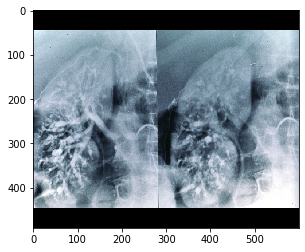

In [6]:
plt.imshow(torchvision.transforms.ToPILImage(mode='RGB')(train_set[32794]['image'])) #plot indexed imaged
                                                                                         #from dataset 1716
    
                                                                                    # good test cases 841 , 1716

In [4]:
#define custom collate function
def my_collate(batch):
    data = [item for item in batch]
    #target = [item[1] for item in batch]
    #target = torch.LongTensor(target)
    return data

# create dataloader
trainset = DataLoader(dataset=train_set,
                      batch_size=4,
                      shuffle=True)
                      #collate_fn=my_collate) # use custom collate function here
                      #pin_memory=True)

In [5]:
sample = iter(trainset).next() #iterate to next minibatch from dataloader
print(sample['image'][3].size()) # show size of one picture in the minibatch


torch.Size([3, 491, 600])


In [12]:
sample['image'].size()

torch.Size([4, 3, 491, 600])

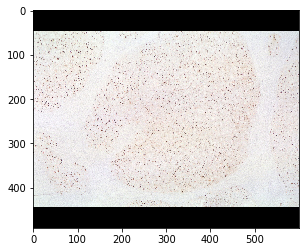

In [13]:
plt.imshow(torchvision.transforms.ToPILImage(mode='RGB')(sample['image'][3])) #plot image from minibatch

In [ ]:
#### validation dataloader

In [6]:
annotation_path = '/Users/ianleefmans/Desktop/data/val/part3.json'
path = '/Users/ianleefmans/Desktop/data/val'
index_dict = path_dict(path,2424,25, training=False)


#annotation = pd.read_json(annotation_path)

#create trainset
train_set = create_dataset(annotation_path, index_dict, img_dir = path, 
                          transform = torchvision.transforms.ToTensor(), training=False)

In [7]:
def my_collate(batch):
    data = [item for item in batch]
    #target = [item[1] for item in batch]
    #target = torch.LongTensor(target)
    return data

# create dataloader
trainset = DataLoader(dataset=train_set,
                      batch_size=4,
                      shuffle=True)
                      #collate_fn=my_collate) # use custom collate function here
                      #pin_memory=True)

In [8]:
sample = iter(trainset).next() #iterate to next minibatch from dataloader
print(sample['image'][3].size()) # show size of one picture in the minibatch

torch.Size([3, 491, 600])


In [18]:
sample['image'].size()

torch.Size([4, 3, 491, 600])

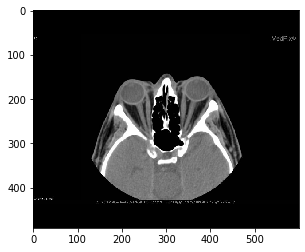

In [19]:
plt.imshow(torchvision.transforms.ToPILImage(mode='RGB')(sample['image'][3])) #plot image from minibatch

# Pretrain Class  
### Variational Autoencoder to train weights of CNN portion of the model  
Class has been created. Here are some outstanding issues:  
  
  1) need to add comments and description, clean up code



#### below is used for testing: 

In [10]:
y = VAE(16).forward(sample['image'])

1, torch.Size([4, 2, 54912])
2 torch.Size([4, 109824])
3 torch.Size([4, 128, 26, 33])
4 torch.Size([4, 3, 491, 600])


In [8]:
list1 = [1,2]
list1 is None

False

# Image Preprocessing Class  
  
  Class has been created. Outstanding issues:  
    
  1) Gather image size information to determine best size to conform to  
       $\textit{*this is a testing issue class does not need to be altered}$

#### Image expansion testing

In [2]:
image = Image.open('/Users/ianleefmans/Desktop/data/train/part2/part2_images/11/218.jpg') 
if image.mode != 'RGB':
    image = image.convert('RGB')
    
image.show()

In [ ]:
preprocess = image_process((avg_height, avg_width))

In [3]:
# largest height: 1310
# largest width: 1544

# smallest height: 84
# smallest width: 60

avg_height = 491
avg_width = 600

image = preprocess.expand(image)
image.show()

In [4]:
image.getpalette

<bound method Image.getpalette of <PIL.Image.Image image mode=RGB size=584x491 at 0x1A292CBE10>>

In [5]:
transform = torchvision.transforms.ToTensor()
image = transform(image)

In [6]:
image2 = preprocess.uniform_size(image)

In [7]:
image2.size()

torch.Size([3, 491, 600])

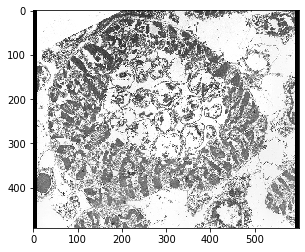

In [8]:
plt.imshow(torchvision.transforms.ToPILImage(mode='RGB')(image2))

#### Testing to find largest image dimensions

In [46]:
height = 9999999
width = 9999999
height_tot = 0
width_tot = 0
count = 0
for i in range(820):
    try:
        image = Image.open('/Users/ianleefmans/Desktop/data/train/part1/Images/Fig.'+str(i)+'.jpg')
        if image.height<height:
            height = image.height
        if image.width<width:
            width = image.width
        height_tot+= image.height
        width_tot+=image.width
        count+=1
        image.close()
    except:
        pass
    finally:
        pass
    
for i in range(886):
    try:
        image = Image.open('/Users/ianleefmans/Desktop/data/train/part1/Images/img_'+str(i)+'.jpg')
        if image.height<height:
            height = image.height
        if image.width<width:
            width = image.width
        height_tot+= image.height
        width_tot+=image.width
        count+=1
        image.close()
    except:
        pass
    finally:
        pass
    
path = '/Users/ianleefmans/Desktop/data/train'
index_dict = path_dict(path)
count_h=0
count_w=0
for i in range(3329):
    try:
        image = Image.open('/Users/ianleefmans/Desktop/data/train/part2/part2_images/'+str(index_dict[i])+ '/'+ str(i)+'.jpg')
        if image.height<height:
            height = image.height
        else:
            count_h+=1
        if image.width<width:
            width = image.width
        else:
            count_w+=1
        height_tot+= image.height
        width_tot+=image.width
        count+=1
        image.close()
    except:
        pass
    finally:
        pass
height_avg = height_tot/count
width_avg = width_tot/count


In [47]:
height

84

In [48]:
width

60

In [46]:
count_h

3329

In [47]:
count_w

3329

In [51]:
height_avg

491.0894357743097

In [52]:
width_avg

707.9197679071628

In [53]:
count

4998

In [55]:
(708+491)/2

599.5

In [27]:
x = list(np.arange(0,2423))


In [3]:
x = list(np.arange(0,2423))
folder_path = '/Users/ianleefmans/Desktop/data/val'
lis = []
for i in range(2424):
    for j in range(25):
        path = os.path.join(folder_path , f'pic/{str(j)}', f'{str(i)}.jpg')
        try:
            image = Image.open(path)
            x.remove(i)
        except:
            print(i)
        finally:
            pass



0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
17
17
17
17
17
1

128
128
128
129
129
129
129
129
129
129
129
129
129
129
129
129
129
129
129
129
129
129
129
129
129
129
129
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
130
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
131
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
132
133
133
133
133
133
133
133
133
133
133
133
133
133
133
133
133
133
133
133
133
133
133
133
133
134
134
134
134
134
134
134
134
134
134
134
134
134
134
134
134
134
134
134
134
134
134
134
134
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
135
136
136
136
136
136
136
136
136
136
136
136
136
136
136
136
136
136
136
136
136
136
136
136
136
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
137
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
138
139
139
139
139
139
139
139


233
233
233
233
233
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
234
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
235
236
236
236
236
236
236
236
236
236
236
236
236
236
236
236
236
236
236
236
236
236
236
236
236
237
237
237
237
237
237
237
237
237
237
237
237
237
237
237
237
237
237
237
237
237
237
237
237
238
238
238
238
238
238
238
238
238
238
238
238
238
238
238
238
238
238
238
238
238
238
238
238
239
239
239
239
239
239
239
239
239
239
239
239
239
239
239
239
239
239
239
239
239
239
239
239
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
240
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
241
242
242
242
242
242
242
242
242
242
242
242
242
242
242
242
242
242
242
242
242
242
242
242
242
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
243
244
244
244
244
244


331
331
331
331
331
331
331
331
331
331
331
331
331
331
331
331
331
331
331
331
331
332
332
332
332
332
332
332
332
332
332
332
332
332
332
332
332
332
332
332
332
332
332
332
332
333
333
333
333
333
333
333
333
333
333
333
333
333
333
333
333
333
333
333
333
333
333
333
333
334
334
334
334
334
334
334
334
334
334
334
334
334
334
334
334
334
334
334
334
334
334
334
334
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
335
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
336
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
337
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
338
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
339
340
340
340
340
340
340
340
340
340
340
340
340
340
340
340
340
340
340
340
340
340
340
340
340
341
341
341
341
341
341
341
341
341
341
341
341
341


425
425
425
425
425
425
425
425
425
425
425
426
426
426
426
426
426
426
426
426
426
426
426
426
426
426
426
426
426
426
426
426
426
426
426
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
428
428
428
428
428
428
428
428
428
428
428
428
428
428
428
428
428
428
428
428
428
428
428
428
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
429
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
431
431
431
431
431
431
431
431
431
431
431
431
431
431
431
431
431
431
431
431
431
431
431
431
432
432
432
432
432
432
432
432
432
432
432
432
432
432
432
432
432
432
432
432
432
432
432
432
433
433
433
433
433
433
433
433
433
433
433
433
433
433
433
433
433
433
433
433
433
433
433
433
434
434
434
434
434
434
434
434
434
434
434
434
434
434
434
434
434
434
434
434
434
434
434
434
435
435
435
435
435
435
435
435
435
435
435
435
435
435
435
435
435
435
435
435
435
435
435


514
514
514
514
515
515
515
515
515
515
515
515
515
515
515
515
515
515
515
515
515
515
515
515
515
515
515
515
516
516
516
516
516
516
516
516
516
516
516
516
516
516
516
516
516
516
516
516
516
516
516
516
517
517
517
517
517
517
517
517
517
517
517
517
517
517
517
517
517
517
517
517
517
517
517
517
518
518
518
518
518
518
518
518
518
518
518
518
518
518
518
518
518
518
518
518
518
518
518
518
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
519
520
520
520
520
520
520
520
520
520
520
520
520
520
520
520
520
520
520
520
520
520
520
520
520
521
521
521
521
521
521
521
521
521
521
521
521
521
521
521
521
521
521
521
521
521
521
521
521
522
522
522
522
522
522
522
522
522
522
522
522
522
522
522
522
522
522
522
522
522
522
522
522
523
523
523
523
523
523
523
523
523
523
523
523
523
523
523
523
523
523
523
523
523
523
523
523
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
524
525
525
525
525
525
525


610
610
610
610
610
610
610
610
611
611
611
611
611
611
611
611
611
611
611
611
611
611
611
611
611
611
611
611
611
611
611
611
612
612
612
612
612
612
612
612
612
612
612
612
612
612
612
612
612
612
612
612
612
612
612
612
613
613
613
613
613
613
613
613
613
613
613
613
613
613
613
613
613
613
613
613
613
613
613
613
614
614
614
614
614
614
614
614
614
614
614
614
614
614
614
614
614
614
614
614
614
614
614
614
615
615
615
615
615
615
615
615
615
615
615
615
615
615
615
615
615
615
615
615
615
615
615
615
615
616
616
616
616
616
616
616
616
616
616
616
616
616
616
616
616
616
616
616
616
616
616
616
616
617
617
617
617
617
617
617
617
617
617
617
617
617
617
617
617
617
617
617
617
617
617
617
617
618
618
618
618
618
618
618
618
618
618
618
618
618
618
618
618
618
618
618
618
618
618
618
618
619
619
619
619
619
619
619
619
619
619
619
619
619
619
619
619
619
619
619
619
619
619
619
619
620
620
620
620
620
620
620
620
620
620
620
620
620
620
620
620
620
620
620
620
620
620
620
620
621


724
724
724
724
724
724
724
724
724
724
724
724
724
724
724
725
725
725
725
725
725
725
725
725
725
725
725
725
725
725
725
725
725
725
725
725
725
725
725
726
726
726
726
726
726
726
726
726
726
726
726
726
726
726
726
726
726
726
726
726
726
726
726
727
727
727
727
727
727
727
727
727
727
727
727
727
727
727
727
727
727
727
727
727
727
727
727
728
728
728
728
728
728
728
728
728
728
728
728
728
728
728
728
728
728
728
728
728
728
728
728
729
729
729
729
729
729
729
729
729
729
729
729
729
729
729
729
729
729
729
729
729
729
729
729
730
730
730
730
730
730
730
730
730
730
730
730
730
730
730
730
730
730
730
730
730
730
730
730
731
731
731
731
731
731
731
731
731
731
731
731
731
731
731
731
731
731
731
731
731
731
731
731
732
732
732
732
732
732
732
732
732
732
732
732
732
732
732
732
732
732
732
732
732
732
732
732
733
733
733
733
733
733
733
733
733
733
733
733
733
733
733
733
733
733
733
733
733
733
733
733
734
734
734
734
734
734
734
734
734
734
734
734
734
734
734
734
734
734
734


828
828
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
829
830
830
830
830
830
830
830
830
830
830
830
830
830
830
830
830
830
830
830
830
830
830
830
830
831
831
831
831
831
831
831
831
831
831
831
831
831
831
831
831
831
831
831
831
831
831
831
831
832
832
832
832
832
832
832
832
832
832
832
832
832
832
832
832
832
832
832
832
832
832
832
832
833
833
833
833
833
833
833
833
833
833
833
833
833
833
833
833
833
833
833
833
833
833
833
833
834
834
834
834
834
834
834
834
834
834
834
834
834
834
834
834
834
834
834
834
834
834
834
834
835
835
835
835
835
835
835
835
835
835
835
835
835
835
835
835
835
835
835
835
835
835
835
835
836
836
836
836
836
836
836
836
836
836
836
836
836
836
836
836
836
836
836
836
836
836
836
836
837
837
837
837
837
837
837
837
837
837
837
837
837
837
837
837
837
837
837
837
837
837
837
837
838
838
838
838
838
838
838
838
838
838
838
838
838
838
838
838
838
838
838
838
838
838
838
838
839
839
839
839
839
839
839
839


935
935
935
935
935
935
935
935
935
935
935
935
936
936
936
936
936
936
936
936
936
936
936
936
936
936
936
936
936
936
936
936
936
936
936
936
937
937
937
937
937
937
937
937
937
937
937
937
937
937
937
937
937
937
937
937
937
937
937
937
938
938
938
938
938
938
938
938
938
938
938
938
938
938
938
938
938
938
938
938
938
938
938
938
939
939
939
939
939
939
939
939
939
939
939
939
939
939
939
939
939
939
939
939
939
939
939
939
940
940
940
940
940
940
940
940
940
940
940
940
940
940
940
940
940
940
940
940
940
940
940
940
941
941
941
941
941
941
941
941
941
941
941
941
941
941
941
941
941
941
941
941
941
941
941
941
942
942
942
942
942
942
942
942
942
942
942
942
942
942
942
942
942
942
942
942
942
942
942
942
943
943
943
943
943
943
943
943
943
943
943
943
943
943
943
943
943
943
943
943
943
943
943
943
944
944
944
944
944
944
944
944
944
944
944
944
944
944
944
944
944
944
944
944
944
944
944
944
945
945
945
945
945
945
945
945
945
945
945
945
945
945
945
945
945
945
945
945
945
945


1052
1052
1052
1052
1052
1052
1052
1052
1052
1052
1052
1052
1052
1052
1052
1052
1052
1053
1053
1053
1053
1053
1053
1053
1053
1053
1053
1053
1053
1053
1053
1053
1053
1053
1053
1053
1053
1053
1053
1053
1053
1054
1054
1054
1054
1054
1054
1054
1054
1054
1054
1054
1054
1054
1054
1054
1054
1054
1054
1054
1054
1054
1054
1054
1054
1055
1055
1055
1055
1055
1055
1055
1055
1055
1055
1055
1055
1055
1055
1055
1055
1055
1055
1055
1055
1055
1055
1055
1055
1056
1056
1056
1056
1056
1056
1056
1056
1056
1056
1056
1056
1056
1056
1056
1056
1056
1056
1056
1056
1056
1056
1056
1056
1057
1057
1057
1057
1057
1057
1057
1057
1057
1057
1057
1057
1057
1057
1057
1057
1057
1057
1057
1057
1057
1057
1057
1057
1058
1058
1058
1058
1058
1058
1058
1058
1058
1058
1058
1058
1058
1058
1058
1058
1058
1058
1058
1058
1058
1058
1058
1058
1059
1059
1059
1059
1059
1059
1059
1059
1059
1059
1059
1059
1059
1059
1059
1059
1059
1059
1059
1059
1059
1059
1059
1059
1060
1060
1060
1060
1060
1060
1060
1060
1060
1060
1060
1060
1060
1060
1060


1129
1129
1129
1129
1129
1129
1129
1129
1129
1129
1129
1129
1129
1129
1129
1129
1129
1129
1129
1130
1130
1130
1130
1130
1130
1130
1130
1130
1130
1130
1130
1130
1130
1130
1130
1130
1130
1130
1130
1130
1130
1130
1130
1131
1131
1131
1131
1131
1131
1131
1131
1131
1131
1131
1131
1131
1131
1131
1131
1131
1131
1131
1131
1131
1131
1131
1131
1132
1132
1132
1132
1132
1132
1132
1132
1132
1132
1132
1132
1132
1132
1132
1132
1132
1132
1132
1132
1132
1132
1132
1132
1133
1133
1133
1133
1133
1133
1133
1133
1133
1133
1133
1133
1133
1133
1133
1133
1133
1133
1133
1133
1133
1133
1133
1133
1134
1134
1134
1134
1134
1134
1134
1134
1134
1134
1134
1134
1134
1134
1134
1134
1134
1134
1134
1134
1134
1134
1134
1134
1135
1135
1135
1135
1135
1135
1135
1135
1135
1135
1135
1135
1135
1135
1135
1135
1135
1135
1135
1135
1135
1135
1135
1135
1136
1136
1136
1136
1136
1136
1136
1136
1136
1136
1136
1136
1136
1136
1136
1136
1136
1136
1136
1136
1136
1136
1136
1136
1137
1137
1137
1137
1137
1137
1137
1137
1137
1137
1137
1137
1137


1206
1206
1206
1206
1206
1206
1206
1206
1206
1206
1206
1206
1207
1207
1207
1207
1207
1207
1207
1207
1207
1207
1207
1207
1207
1207
1207
1207
1207
1207
1207
1207
1207
1207
1207
1207
1208
1208
1208
1208
1208
1208
1208
1208
1208
1208
1208
1208
1208
1208
1208
1208
1208
1208
1208
1208
1208
1208
1208
1208
1209
1209
1209
1209
1209
1209
1209
1209
1209
1209
1209
1209
1209
1209
1209
1209
1209
1209
1209
1209
1209
1209
1209
1209
1210
1210
1210
1210
1210
1210
1210
1210
1210
1210
1210
1210
1210
1210
1210
1210
1210
1210
1210
1210
1210
1210
1210
1210
1211
1211
1211
1211
1211
1211
1211
1211
1211
1211
1211
1211
1211
1211
1211
1211
1211
1211
1211
1211
1211
1211
1211
1211
1212
1212
1212
1212
1212
1212
1212
1212
1212
1212
1212
1212
1212
1212
1212
1212
1212
1212
1212
1212
1212
1212
1212
1212
1213
1213
1213
1213
1213
1213
1213
1213
1213
1213
1213
1213
1213
1213
1213
1213
1213
1213
1213
1213
1213
1213
1213
1213
1214
1214
1214
1214
1214
1214
1214
1214
1214
1214
1214
1214
1214
1214
1214
1214
1214
1214
1214
1214


1283
1283
1283
1283
1283
1283
1284
1284
1284
1284
1284
1284
1284
1284
1284
1284
1284
1284
1284
1284
1284
1284
1284
1284
1284
1284
1284
1284
1284
1284
1285
1285
1285
1285
1285
1285
1285
1285
1285
1285
1285
1285
1285
1285
1285
1285
1285
1285
1285
1285
1285
1285
1285
1285
1286
1286
1286
1286
1286
1286
1286
1286
1286
1286
1286
1286
1286
1286
1286
1286
1286
1286
1286
1286
1286
1286
1286
1286
1287
1287
1287
1287
1287
1287
1287
1287
1287
1287
1287
1287
1287
1287
1287
1287
1287
1287
1287
1287
1287
1287
1287
1287
1288
1288
1288
1288
1288
1288
1288
1288
1288
1288
1288
1288
1288
1288
1288
1288
1288
1288
1288
1288
1288
1288
1288
1288
1289
1289
1289
1289
1289
1289
1289
1289
1289
1289
1289
1289
1289
1289
1289
1289
1289
1289
1289
1289
1289
1289
1289
1289
1290
1290
1290
1290
1290
1290
1290
1290
1290
1290
1290
1290
1290
1290
1290
1290
1290
1290
1290
1290
1290
1290
1290
1290
1291
1291
1291
1291
1291
1291
1291
1291
1291
1291
1291
1291
1291
1291
1291
1291
1291
1291
1291
1291
1291
1291
1291
1291
1292
1292


1361
1361
1361
1361
1361
1361
1361
1361
1361
1361
1361
1361
1361
1361
1361
1361
1361
1361
1361
1361
1362
1362
1362
1362
1362
1362
1362
1362
1362
1362
1362
1362
1362
1362
1362
1362
1362
1362
1362
1362
1362
1362
1362
1362
1363
1363
1363
1363
1363
1363
1363
1363
1363
1363
1363
1363
1363
1363
1363
1363
1363
1363
1363
1363
1363
1363
1363
1363
1364
1364
1364
1364
1364
1364
1364
1364
1364
1364
1364
1364
1364
1364
1364
1364
1364
1364
1364
1364
1364
1364
1364
1364
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1366
1366
1366
1366
1366
1366
1366
1366
1366
1366
1366
1366
1366
1366
1366
1366
1366
1366
1366
1366
1366
1366
1366
1366
1367
1367
1367
1367
1367
1367
1367
1367
1367
1367
1367
1367
1367
1367
1367
1367
1367
1367
1367
1367
1367
1367
1367
1367
1368
1368
1368
1368
1368
1368
1368
1368
1368
1368
1368
1368
1368
1368
1368
1368
1368
1368
1368
1368
1368
1368
1368
1368
1369
1369
1369
1369
1369
1369
1369
1369
1369
1369
1369
1369


1439
1439
1439
1439
1439
1439
1439
1439
1439
1439
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1441
1441
1441
1441
1441
1441
1441
1441
1441
1441
1441
1441
1441
1441
1441
1441
1441
1441
1441
1441
1441
1441
1441
1441
1442
1442
1442
1442
1442
1442
1442
1442
1442
1442
1442
1442
1442
1442
1442
1442
1442
1442
1442
1442
1442
1442
1442
1442
1443
1443
1443
1443
1443
1443
1443
1443
1443
1443
1443
1443
1443
1443
1443
1443
1443
1443
1443
1443
1443
1443
1443
1443
1444
1444
1444
1444
1444
1444
1444
1444
1444
1444
1444
1444
1444
1444
1444
1444
1444
1444
1444
1444
1444
1444
1444
1444
1445
1445
1445
1445
1445
1445
1445
1445
1445
1445
1445
1445
1445
1445
1445
1445
1445
1445
1445
1445
1445
1445
1445
1445
1446
1446
1446
1446
1446
1446
1446
1446
1446
1446
1446
1446
1446
1446
1446
1446
1446
1446
1446
1446
1446
1446
1446
1446
1447
1447
1447
1447
1447
1447
1447
1447
1447
1447
1447
1447
1447
1447
1447
1447
1447
1447
1447
1447
1447
1447


1515
1515
1515
1515
1515
1515
1515
1515
1515
1515
1515
1515
1516
1516
1516
1516
1516
1516
1516
1516
1516
1516
1516
1516
1516
1516
1516
1516
1516
1516
1516
1516
1516
1516
1516
1516
1517
1517
1517
1517
1517
1517
1517
1517
1517
1517
1517
1517
1517
1517
1517
1517
1517
1517
1517
1517
1517
1517
1517
1517
1518
1518
1518
1518
1518
1518
1518
1518
1518
1518
1518
1518
1518
1518
1518
1518
1518
1518
1518
1518
1518
1518
1518
1518
1519
1519
1519
1519
1519
1519
1519
1519
1519
1519
1519
1519
1519
1519
1519
1519
1519
1519
1519
1519
1519
1519
1519
1519
1520
1520
1520
1520
1520
1520
1520
1520
1520
1520
1520
1520
1520
1520
1520
1520
1520
1520
1520
1520
1520
1520
1520
1520
1521
1521
1521
1521
1521
1521
1521
1521
1521
1521
1521
1521
1521
1521
1521
1521
1521
1521
1521
1521
1521
1521
1521
1521
1522
1522
1522
1522
1522
1522
1522
1522
1522
1522
1522
1522
1522
1522
1522
1522
1522
1522
1522
1522
1522
1522
1522
1522
1523
1523
1523
1523
1523
1523
1523
1523
1523
1523
1523
1523
1523
1523
1523
1523
1523
1523
1523
1523


1587
1587
1587
1587
1587
1587
1587
1587
1587
1588
1588
1588
1588
1588
1588
1588
1588
1588
1588
1588
1588
1588
1588
1588
1588
1588
1588
1588
1588
1588
1588
1588
1588
1589
1589
1589
1589
1589
1589
1589
1589
1589
1589
1589
1589
1589
1589
1589
1589
1589
1589
1589
1589
1589
1589
1589
1589
1590
1590
1590
1590
1590
1590
1590
1590
1590
1590
1590
1590
1590
1590
1590
1590
1590
1590
1590
1590
1590
1590
1590
1590
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1591
1592
1592
1592
1592
1592
1592
1592
1592
1592
1592
1592
1592
1592
1592
1592
1592
1592
1592
1592
1592
1592
1592
1592
1592
1593
1593
1593
1593
1593
1593
1593
1593
1593
1593
1593
1593
1593
1593
1593
1593
1593
1593
1593
1593
1593
1593
1593
1593
1594
1594
1594
1594
1594
1594
1594
1594
1594
1594
1594
1594
1594
1594
1594
1594
1594
1594
1594
1594
1594
1594
1594
1594
1595
1595
1595
1595
1595
1595
1595
1595
1595
1595
1595
1595
1595
1595
1595
1595
1595
1595
1595
1595
1595
1595
1595


1661
1661
1661
1661
1661
1661
1661
1661
1662
1662
1662
1662
1662
1662
1662
1662
1662
1662
1662
1662
1662
1662
1662
1662
1662
1662
1662
1662
1662
1662
1662
1662
1663
1663
1663
1663
1663
1663
1663
1663
1663
1663
1663
1663
1663
1663
1663
1663
1663
1663
1663
1663
1663
1663
1663
1663
1664
1664
1664
1664
1664
1664
1664
1664
1664
1664
1664
1664
1664
1664
1664
1664
1664
1664
1664
1664
1664
1664
1664
1664
1665
1665
1665
1665
1665
1665
1665
1665
1665
1665
1665
1665
1665
1665
1665
1665
1665
1665
1665
1665
1665
1665
1665
1665
1666
1666
1666
1666
1666
1666
1666
1666
1666
1666
1666
1666
1666
1666
1666
1666
1666
1666
1666
1666
1666
1666
1666
1666
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1667
1668
1668
1668
1668
1668
1668
1668
1668
1668
1668
1668
1668
1668
1668
1668
1668
1668
1668
1668
1668
1668
1668
1668
1668
1669
1669
1669
1669
1669
1669
1669
1669
1669
1669
1669
1669
1669
1669
1669
1669
1669
1669
1669
1669
1669
1669
1669
1669


1748
1748
1748
1748
1748
1748
1748
1749
1749
1749
1749
1749
1749
1749
1749
1749
1749
1749
1749
1749
1749
1749
1749
1749
1749
1749
1749
1749
1749
1749
1749
1750
1750
1750
1750
1750
1750
1750
1750
1750
1750
1750
1750
1750
1750
1750
1750
1750
1750
1750
1750
1750
1750
1750
1750
1751
1751
1751
1751
1751
1751
1751
1751
1751
1751
1751
1751
1751
1751
1751
1751
1751
1751
1751
1751
1751
1751
1751
1751
1752
1752
1752
1752
1752
1752
1752
1752
1752
1752
1752
1752
1752
1752
1752
1752
1752
1752
1752
1752
1752
1752
1752
1752
1753
1753
1753
1753
1753
1753
1753
1753
1753
1753
1753
1753
1753
1753
1753
1753
1753
1753
1753
1753
1753
1753
1753
1753
1754
1754
1754
1754
1754
1754
1754
1754
1754
1754
1754
1754
1754
1754
1754
1754
1754
1754
1754
1754
1754
1754
1754
1754
1755
1755
1755
1755
1755
1755
1755
1755
1755
1755
1755
1755
1755
1755
1755
1755
1755
1755
1755
1755
1755
1755
1755
1755
1756
1756
1756
1756
1756
1756
1756
1756
1756
1756
1756
1756
1756
1756
1756
1756
1756
1756
1756
1756
1756
1756
1756
1756
1757


1830
1830
1830
1830
1830
1830
1830
1830
1830
1830
1830
1830
1830
1830
1830
1830
1830
1830
1831
1831
1831
1831
1831
1831
1831
1831
1831
1831
1831
1831
1831
1831
1831
1831
1831
1831
1831
1831
1831
1831
1831
1831
1832
1832
1832
1832
1832
1832
1832
1832
1832
1832
1832
1832
1832
1832
1832
1832
1832
1832
1832
1832
1832
1832
1832
1832
1833
1833
1833
1833
1833
1833
1833
1833
1833
1833
1833
1833
1833
1833
1833
1833
1833
1833
1833
1833
1833
1833
1833
1833
1834
1834
1834
1834
1834
1834
1834
1834
1834
1834
1834
1834
1834
1834
1834
1834
1834
1834
1834
1834
1834
1834
1834
1834
1834
1835
1835
1835
1835
1835
1835
1835
1835
1835
1835
1835
1835
1835
1835
1835
1835
1835
1835
1835
1835
1835
1835
1835
1835
1836
1836
1836
1836
1836
1836
1836
1836
1836
1836
1836
1836
1836
1836
1836
1836
1836
1836
1836
1836
1836
1836
1836
1836
1837
1837
1837
1837
1837
1837
1837
1837
1837
1837
1837
1837
1837
1837
1837
1837
1837
1837
1837
1837
1837
1837
1837
1837
1838
1838
1838
1838
1838
1838
1838
1838
1838
1838
1838
1838
1838


1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1921
1922
1922
1922
1922
1922
1922
1922
1922
1922
1922
1922
1922
1922
1922
1922
1922
1922
1922
1922
1922
1922
1922
1922
1922
1923
1923
1923
1923
1923
1923
1923
1923
1923
1923
1923
1923
1923
1923
1923
1923
1923
1923
1923
1923
1923
1923
1923
1923
1924
1924
1924
1924
1924
1924
1924
1924
1924
1924
1924
1924
1924
1924
1924
1924
1924
1924
1924
1924
1924
1924
1924
1924
1925
1925
1925
1925
1925
1925
1925
1925
1925
1925
1925
1925
1925
1925
1925
1925
1925
1925
1925
1925
1925
1925
1925
1925
1926
1926
1926
1926
1926
1926
1926
1926
1926
1926
1926
1926
1926
1926
1926
1926
1926
1926
1926
1926
1926
1926
1926
1926
1927
1927
1927
1927
1927
1927
1927
1927
1927
1927
1927
1927
1927
1927
1927
1927
1927
1927
1927
1927
1927
1927
1927
1927
1928
1928
1928
1928
1928
1928
1928
1928
1928
1928
1928
1928
1928
1928
1928
1928
1928
1928
1928
1928
1928
1928
1928
1928
1929
1929
1929
1929
1929
1929
1929
1929
1929
1929


1996
1996
1996
1996
1996
1996
1996
1996
1996
1996
1996
1996
1996
1996
1996
1996
1996
1996
1996
1996
1996
1996
1996
1997
1997
1997
1997
1997
1997
1997
1997
1997
1997
1997
1997
1997
1997
1997
1997
1997
1997
1997
1997
1997
1997
1997
1997
1998
1998
1998
1998
1998
1998
1998
1998
1998
1998
1998
1998
1998
1998
1998
1998
1998
1998
1998
1998
1998
1998
1998
1998
1999
1999
1999
1999
1999
1999
1999
1999
1999
1999
1999
1999
1999
1999
1999
1999
1999
1999
1999
1999
1999
1999
1999
1999
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2001
2001
2001
2001
2001
2001
2001
2001
2001
2001
2001
2001
2001
2001
2001
2001
2001
2001
2001
2001
2001
2001
2001
2001
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2004
2004
2004
2004
2004
2004
2004
2004
2004


2067
2067
2067
2067
2067
2067
2068
2068
2068
2068
2068
2068
2068
2068
2068
2068
2068
2068
2068
2068
2068
2068
2068
2068
2068
2068
2068
2068
2068
2068
2069
2069
2069
2069
2069
2069
2069
2069
2069
2069
2069
2069
2069
2069
2069
2069
2069
2069
2069
2069
2069
2069
2069
2069
2070
2070
2070
2070
2070
2070
2070
2070
2070
2070
2070
2070
2070
2070
2070
2070
2070
2070
2070
2070
2070
2070
2070
2070
2071
2071
2071
2071
2071
2071
2071
2071
2071
2071
2071
2071
2071
2071
2071
2071
2071
2071
2071
2071
2071
2071
2071
2071
2072
2072
2072
2072
2072
2072
2072
2072
2072
2072
2072
2072
2072
2072
2072
2072
2072
2072
2072
2072
2072
2072
2072
2072
2073
2073
2073
2073
2073
2073
2073
2073
2073
2073
2073
2073
2073
2073
2073
2073
2073
2073
2073
2073
2073
2073
2073
2073
2074
2074
2074
2074
2074
2074
2074
2074
2074
2074
2074
2074
2074
2074
2074
2074
2074
2074
2074
2074
2074
2074
2074
2074
2075
2075
2075
2075
2075
2075
2075
2075
2075
2075
2075
2075
2075
2075
2075
2075
2075
2075
2075
2075
2075
2075
2075
2075
2076
2076


2138
2138
2138
2139
2139
2139
2139
2139
2139
2139
2139
2139
2139
2139
2139
2139
2139
2139
2139
2139
2139
2139
2139
2139
2139
2139
2139
2140
2140
2140
2140
2140
2140
2140
2140
2140
2140
2140
2140
2140
2140
2140
2140
2140
2140
2140
2140
2140
2140
2140
2140
2141
2141
2141
2141
2141
2141
2141
2141
2141
2141
2141
2141
2141
2141
2141
2141
2141
2141
2141
2141
2141
2141
2141
2141
2142
2142
2142
2142
2142
2142
2142
2142
2142
2142
2142
2142
2142
2142
2142
2142
2142
2142
2142
2142
2142
2142
2142
2142
2143
2143
2143
2143
2143
2143
2143
2143
2143
2143
2143
2143
2143
2143
2143
2143
2143
2143
2143
2143
2143
2143
2143
2143
2144
2144
2144
2144
2144
2144
2144
2144
2144
2144
2144
2144
2144
2144
2144
2144
2144
2144
2144
2144
2144
2144
2144
2144
2145
2145
2145
2145
2145
2145
2145
2145
2145
2145
2145
2145
2145
2145
2145
2145
2145
2145
2145
2145
2145
2145
2145
2145
2146
2146
2146
2146
2146
2146
2146
2146
2146
2146
2146
2146
2146
2146
2146
2146
2146
2146
2146
2146
2146
2146
2146
2146
2147
2147
2147
2147
2147


2210
2210
2210
2210
2210
2210
2210
2210
2210
2210
2210
2210
2210
2210
2210
2210
2211
2211
2211
2211
2211
2211
2211
2211
2211
2211
2211
2211
2211
2211
2211
2211
2211
2211
2211
2211
2211
2211
2211
2211
2212
2212
2212
2212
2212
2212
2212
2212
2212
2212
2212
2212
2212
2212
2212
2212
2212
2212
2212
2212
2212
2212
2212
2212
2212
2213
2213
2213
2213
2213
2213
2213
2213
2213
2213
2213
2213
2213
2213
2213
2213
2213
2213
2213
2213
2213
2213
2213
2213
2214
2214
2214
2214
2214
2214
2214
2214
2214
2214
2214
2214
2214
2214
2214
2214
2214
2214
2214
2214
2214
2214
2214
2214
2215
2215
2215
2215
2215
2215
2215
2215
2215
2215
2215
2215
2215
2215
2215
2215
2215
2215
2215
2215
2215
2215
2215
2215
2216
2216
2216
2216
2216
2216
2216
2216
2216
2216
2216
2216
2216
2216
2216
2216
2216
2216
2216
2216
2216
2216
2216
2216
2217
2217
2217
2217
2217
2217
2217
2217
2217
2217
2217
2217
2217
2217
2217
2217
2217
2217
2217
2217
2217
2217
2217
2217
2218
2218
2218
2218
2218
2218
2218
2218
2218
2218
2218
2218
2218
2218
2218


2284
2284
2285
2285
2285
2285
2285
2285
2285
2285
2285
2285
2285
2285
2285
2285
2285
2285
2285
2285
2285
2285
2285
2285
2285
2285
2286
2286
2286
2286
2286
2286
2286
2286
2286
2286
2286
2286
2286
2286
2286
2286
2286
2286
2286
2286
2286
2286
2286
2286
2287
2287
2287
2287
2287
2287
2287
2287
2287
2287
2287
2287
2287
2287
2287
2287
2287
2287
2287
2287
2287
2287
2287
2287
2288
2288
2288
2288
2288
2288
2288
2288
2288
2288
2288
2288
2288
2288
2288
2288
2288
2288
2288
2288
2288
2288
2288
2288
2289
2289
2289
2289
2289
2289
2289
2289
2289
2289
2289
2289
2289
2289
2289
2289
2289
2289
2289
2289
2289
2289
2289
2289
2290
2290
2290
2290
2290
2290
2290
2290
2290
2290
2290
2290
2290
2290
2290
2290
2290
2290
2290
2290
2290
2290
2290
2290
2291
2291
2291
2291
2291
2291
2291
2291
2291
2291
2291
2291
2291
2291
2291
2291
2291
2291
2291
2291
2291
2291
2291
2291
2292
2292
2292
2292
2292
2292
2292
2292
2292
2292
2292
2292
2292
2292
2292
2292
2292
2292
2292
2292
2292
2292
2292
2292
2293
2293
2293
2293
2293
2293


2356
2356
2356
2356
2356
2356
2356
2357
2357
2357
2357
2357
2357
2357
2357
2357
2357
2357
2357
2357
2357
2357
2357
2357
2357
2357
2357
2357
2357
2357
2357
2358
2358
2358
2358
2358
2358
2358
2358
2358
2358
2358
2358
2358
2358
2358
2358
2358
2358
2358
2358
2358
2358
2358
2358
2359
2359
2359
2359
2359
2359
2359
2359
2359
2359
2359
2359
2359
2359
2359
2359
2359
2359
2359
2359
2359
2359
2359
2359
2360
2360
2360
2360
2360
2360
2360
2360
2360
2360
2360
2360
2360
2360
2360
2360
2360
2360
2360
2360
2360
2360
2360
2360
2361
2361
2361
2361
2361
2361
2361
2361
2361
2361
2361
2361
2361
2361
2361
2361
2361
2361
2361
2361
2361
2361
2361
2361
2362
2362
2362
2362
2362
2362
2362
2362
2362
2362
2362
2362
2362
2362
2362
2362
2362
2362
2362
2362
2362
2362
2362
2362
2363
2363
2363
2363
2363
2363
2363
2363
2363
2363
2363
2363
2363
2363
2363
2363
2363
2363
2363
2363
2363
2363
2363
2363
2364
2364
2364
2364
2364
2364
2364
2364
2364
2364
2364
2364
2364
2364
2364
2364
2364
2364
2364
2364
2364
2364
2364
2364
2365


In [13]:
lis

[]

In [14]:
path

'/Users/ianleefmans/Desktop/data/val/pic/24/2423.jpg'

In [ ]:
/Users/ianleefmans/Desktop/data/val/pic/24/2400.jpg

In [25]:
x.remove(0)

In [4]:
x

[21,
 41,
 232,
 502,
 510,
 592,
 615,
 657,
 724,
 779,
 786,
 884,
 992,
 1001,
 1009,
 1020,
 1042,
 1143,
 1237,
 1247,
 1260,
 1415,
 1419,
 1564,
 1692,
 1704,
 1705,
 1711,
 1717,
 1746,
 1799,
 1817,
 1834,
 1961,
 1996,
 2018,
 2087,
 2088,
 2212,
 2237,
 2306,
 2347,
 2350,
 2351,
 2352,
 2353,
 2354,
 2355,
 2365,
 2366,
 2367,
 2368,
 2369,
 2370,
 2371,
 2372,
 2373,
 2374,
 2375,
 2376,
 2381,
 2383,
 2387,
 2388,
 2392,
 2393,
 2394,
 2396,
 2416,
 2422]

In [5]:
df = pd.read_json('/Users/ianleefmans/Desktop/data/val/part3.json')

In [6]:
df

Images                                          Questions  \
0          2  What shows subdural hematoma layering along th...   
1          2  Does non-contrast CT show subdural hematoma la...   
2          3  What shows subdural hematoma layering along th...   
3          3  Does non-contrast CT show subdural hematoma la...   
4          4  What shows subdural hematoma layering along th...   
...      ...                                                ...   
9452    2400  Is rim enhancement the classic description for...   
9453    2400  What is also seen in a variety of fluid secret...   
9454    2400  What is this cystic and solid morphology of fl...   
9455    2400  Is this cystic and solid morphology also seen ...   
9456    2400  Is renal perenchyma also seen in a variety of ...   

                             Answers  
0                    non-contrast CT  
1                                yes  
2                    non-contrast CT  
3                                yes  
4                    non-contrast CT  
...                              ...  
9452                              no  
9453  this  cystic  solid morphology  
9454          also seen in a variety  
9455                             yes  
9456                              no  

[9457 rows x 3 columns]

In [8]:
df.Images.unique()

array([   2,    3,    4, ..., 2395, 2399, 2400])

In [9]:
lis = []
for i in df.Images.unique():
    if i in x:
        lis.append(i)

In [10]:
lis

[615, 657, 992, 1001, 1237, 1247, 1260, 1419, 1705, 1996, 2237]

In [10]:
df.loc[~df.Images.isin(['2', '3']),:]

Images                                          Questions  \
4          4  What shows subdural hematoma layering along th...   
5          4  Does non-contrast CT show subdural hematoma la...   
6          5                                What noted within ?   
7          5            Where is several calcifications noted ?   
8          5           Is several calcifications noted within ?   
...      ...                                                ...   
9452    2400  Is rim enhancement the classic description for...   
9453    2400  What is also seen in a variety of fluid secret...   
9454    2400  What is this cystic and solid morphology of fl...   
9455    2400  Is this cystic and solid morphology also seen ...   
9456    2400  Is renal perenchyma also seen in a variety of ...   

                             Answers  
4                    non-contrast CT  
5                                yes  
6             several calcifications  
7                             within  
8                                yes  
...                              ...  
9452                              no  
9453  this  cystic  solid morphology  
9454          also seen in a variety  
9455                             yes  
9456                              no  

[9453 rows x 3 columns]

In [6]:
for q in range(10):
    for i in tqdm(range(10), desc="Training "+str(q)):
        pass

Training 9: 100%|██████████| 10/10 [00:00<00:00, 33420.75it/s]
